## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [3]:
import pandas as pd
import sklearn
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Carregar e processar os dados
housing_data = pd.read_csv('housing.csv')

# Preencher valores faltantes em 'total_bedrooms' com a média da coluna e converter 'ocean_proximity'
mean_total_bedrooms = housing_data['total_bedrooms'].mean()
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(mean_total_bedrooms)

# Converter a coluna categórica 'ocean_proximity' para um formato numérico usando Label Encoding
label_encoder = LabelEncoder()
housing_data['ocean_proximity'] = label_encoder.fit_transform(housing_data['ocean_proximity'])

# Dividir os dados em conjuntos de treinamento (60%), validação (20%), e teste (20%)
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Treinar uma árvore de regressão com profundidade máxima = 8
tree_best = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_best.fit(X_train, y_train)

"Árvore de regressão treinada com profundidade máxima = 8."


'Árvore de regressão treinada com profundidade máxima = 8.'

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [7]:
# Calcular os valores de CCP-Alpha para a árvore treinada
path = tree_best.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Exibir os valores de CCP-Alphas e as impurezas associadas
ccp_alphas, impurities



(array([0.00000000e+00, 1.55103359e+04, 2.52341731e+04, 3.03651217e+04,
        5.89816484e+04, 7.29267603e+04, 1.03157333e+05, 1.07917070e+05,
        1.56224858e+05, 1.81406250e+05, 1.83957122e+05, 2.08149847e+05,
        2.46731804e+05, 2.73488372e+05, 2.90738347e+05, 3.39600057e+05,
        3.45828556e+05, 3.65069041e+05, 4.50045630e+05, 4.79387599e+05,
        5.00772166e+05, 5.30680301e+05, 5.44537601e+05, 5.99741737e+05,
        6.07547017e+05, 6.40390648e+05, 6.46007752e+05, 6.52815575e+05,
        6.54207295e+05, 7.11730183e+05, 7.17813957e+05, 7.23291592e+05,
        7.45734672e+05, 7.70111463e+05, 7.85988372e+05, 8.73065455e+05,
        8.74743468e+05, 8.92253459e+05, 9.07021338e+05, 9.76258403e+05,
        1.00331169e+06, 1.00485577e+06, 1.03785813e+06, 1.08469073e+06,
        1.14403095e+06, 1.19568109e+06, 1.19910627e+06, 1.32563953e+06,
        1.40021602e+06, 1.42511870e+06, 1.43233844e+06, 1.44561787e+06,
        1.45095349e+06, 1.54489150e+06, 1.56178673e+06, 1.601655

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [9]:
# Selecionar um subconjunto dos valores de CCP-Alpha para reduzir o número de árvores a treinar
# Usando intervalos regulares para pegar uma variedade representativa de alphas
subset_alphas = ccp_alphas[::len(ccp_alphas) // 5]  # Aproximadamente 5 valores

# Lista para armazenar as árvores reduzidas
reduced_trees = []

# Treinar uma árvore para cada valor de alpha no subconjunto
for ccp_alpha in subset_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    reduced_trees.append(tree)

# Número de árvores treinadas no subconjunto reduzido
len(reduced_trees)



6

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [11]:
from sklearn.metrics import mean_squared_error

# Dicionário para armazenar o MSE de treinamento e teste para cada árvore
mse_results = {
    "alpha": [],
    "MSE_train": [],
    "MSE_test": []
}

# Calcular o MSE para cada árvore
for alpha, tree in zip(subset_alphas, reduced_trees):
    mse_train = mean_squared_error(y_train, tree.predict(X_train))
    mse_test = mean_squared_error(y_test, tree.predict(X_test))
    mse_results["alpha"].append(alpha)
    mse_results["MSE_train"].append(mse_train)
    mse_results["MSE_test"].append(mse_test)

# Exibir os resultados
mse_results


{'alpha': [0.0,
  1004855.7744070133,
  2988048.7236097045,
  5983825.05900389,
  14777504.906924387,
  4175912479.2502365],
 'MSE_train': [0.0,
  969269322.3551867,
  1904826515.9759073,
  2679442400.800384,
  3484574175.4150796,
  13267138402.404867],
 'MSE_test': [5006891832.070009,
  4415553494.444107,
  4011081379.830952,
  4003548033.5396056,
  4082528231.361545,
  13723279321.026178]}

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

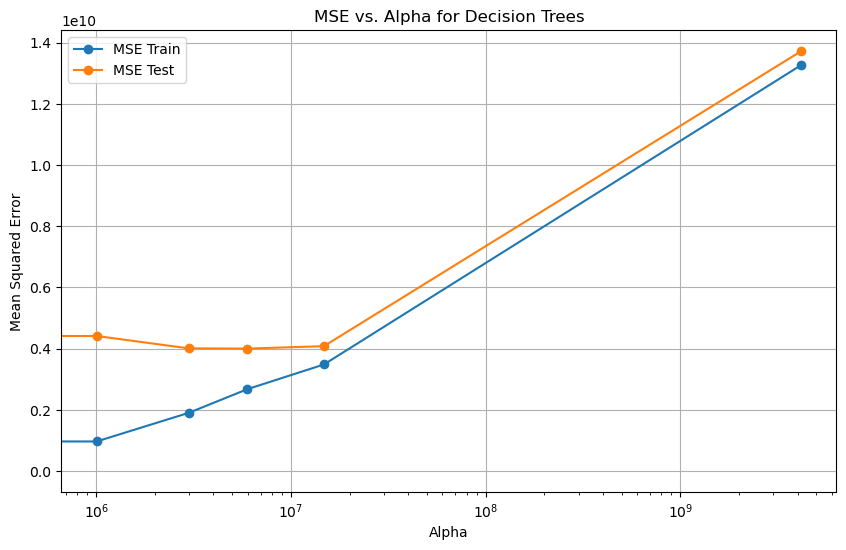

In [13]:
import matplotlib.pyplot as plt

# Extrair dados para o gráfico
alphas = mse_results["alpha"]
mse_train = mse_results["MSE_train"]
mse_test = mse_results["MSE_test"]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='MSE Train', marker='o')
plt.plot(alphas, mse_test, label='MSE Test', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha for Decision Trees')
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.legend()
plt.grid(True)
plt.show()



### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [30]:
from sklearn.metrics import r2_score

# Treinar a árvore com o alpha específico
desired_alpha = 4261698.51  # Alpha próximo do ponto de mínimo do MSE
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=desired_alpha)
best_tree.fit(X_train, y_train)

# Recalcular R-quadrado para o conjunto de treinamento e teste
r2_train = r2_score(y_train, best_tree.predict(X_train))
r2_test = r2_score(y_test, best_tree.predict(X_test))

(r2_train, r2_test)


(0.8250239213108959, 0.7156058001168977)

### 7. Visualize esta árvore.

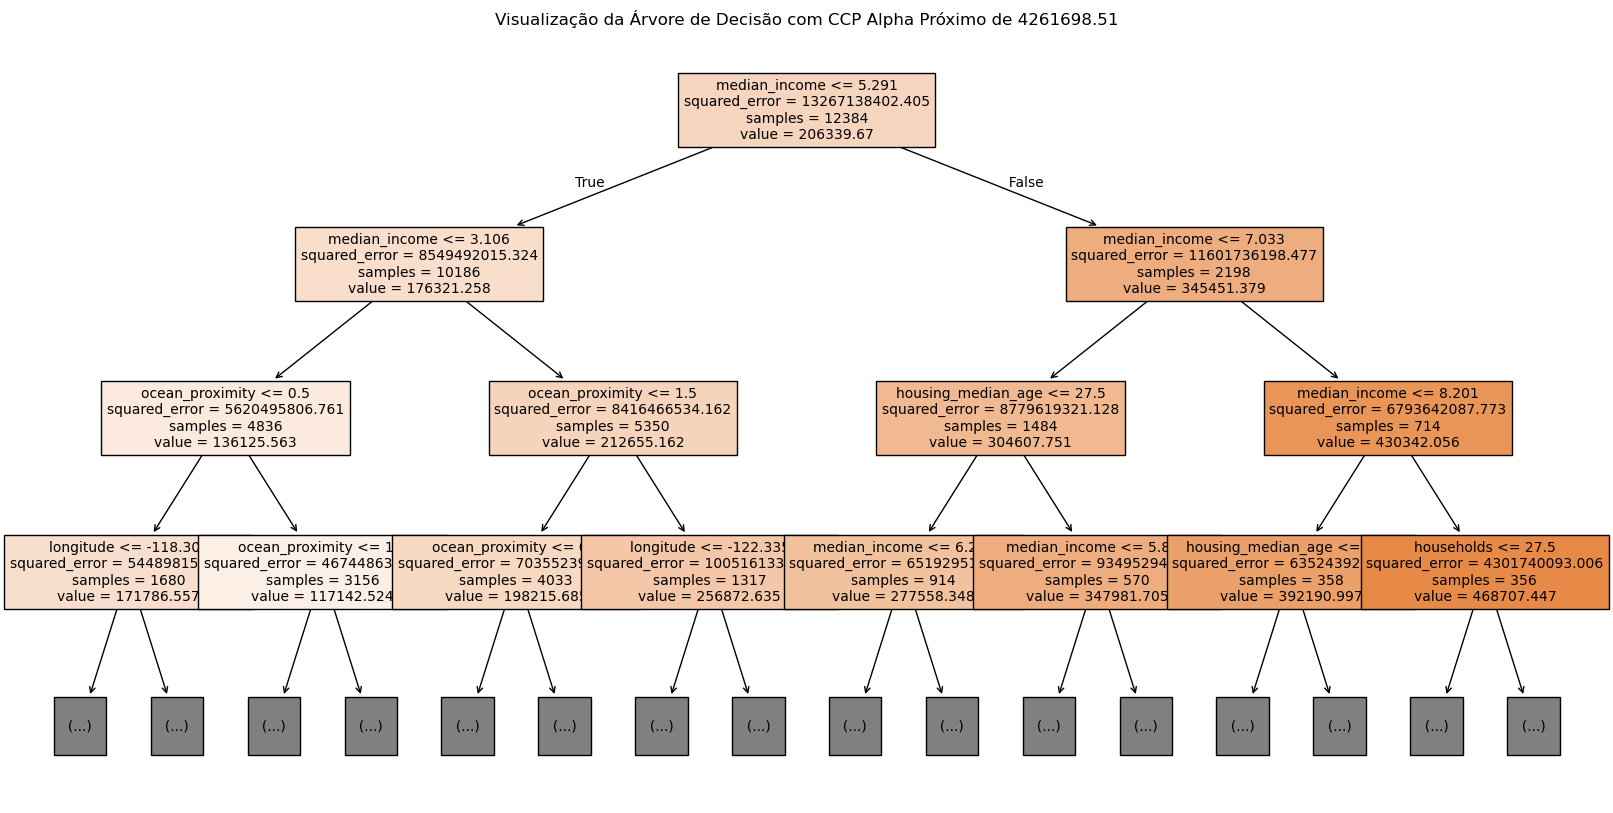

In [17]:
from sklearn.tree import plot_tree

# Gerar a visualização da árvore de decisão selecionada
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns, max_depth=3, filled=True, fontsize=10)
plt.title("Visualização da Árvore de Decisão com CCP Alpha Próximo de 4261698.51")
plt.show()
